Brandon Cunningham

<a href="https://colab.research.google.com/drive/1wqtm80mmi_wcxBphlixu2K_hM1HzCg6J?usp=sharing" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 8**

# **Weeks 10 & 11- matplotlib & seaborn**
* In this homework assignment, you will explore and analyze a public dataset of your choosing. Since this assignment is “open-ended” in nature, you are free to expand upon the requirements below. However, you must meet the minimum requirments as indicated in each section.


* The preferred method for this analysis is in a .ipynb file. Feel free to use whichever platform of your choosing.  


### **Some data examples:**
•	https://www.data.gov/

•	https://opendata.cityofnewyork.us/

•	https://datasetsearch.research.google.com/

•	https://archive.ics.uci.edu/ml/index.php

### **Resources:**

•	https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html

•	https://www.oreilly.com/library/view/python-data-science/9781491912126/ch04.html

•	https://www.data-to-viz.com/



### **Headings or comments**
**You are required to make use of comments, or headings for each section.  You must explain what your code is doing, and the results of running your code.**  Act as if you were giving this assignment to your manager - you must include clear and descriptive information for each section.

### **You may work as a group or indivdually on this assignment.**


# Introduction

In this section, please describe the dataset you are using.  Include a link to the source of this data.  You should also provide some explanation on why you choose this dataset.

The dataset I am using is this [dataset on household median income in numerous cities across the us between 1979 and 2017](https://data.world/zillow-data/median-household-income). For each city it contains 1 record for the size of the city by population and 1 record for median household income for each quarter since 1979. From an initial glance at the data there are many missing values, but all

______________
# Data Exploration
Import your dataset into your .ipynb, create dataframes, and explore your data.  

Include:

* Summary statistics means, medians, quartiles,
* Missing value information
* Any other relevant information about the dataset.  



In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df = pd.read_csv('Affordability_Income_2017Q2.csv')


In [28]:
df.head()

,RegionID,RegionName,SizeRank,1979-03,1979-06,1979-09,1979-12,1980-03,1980-06,1980-09,...,2015-03,2015-06,2015-09,2015-12,2016-03,2016-06,2016-09,2016-12,2017-03,2017-06
0,102001,United States,0,16347.78,16670.31,17005.00,17340.92,17731.96,18018.92,18291.96,...,55101.89,55571.91,55982.59,56443.61,56781.037105,57118.464209,57455.891314,57793.318418,58130.745523,58468.172627
1,394913,"New York, NY",1,17537.06,17882.32,18246.90,18628.91,19096.50,19499.66,19871.00,...,68178.78,68566.98,68916.19,69309.90,69886.398450,70462.896900,71039.395351,71615.893801,72192.392251,72768.890701
2,753899,"Los Angeles-Long Beach-Anaheim, CA",2,17915.63,18279.35,18733.76,19230.16,19819.58,20321.11,20702.53,...,61865.99,62303.60,62759.76,63246.79,63708.637741,64170.485482,64632.333224,65094.180965,65556.028706,66017.876447
3,394463,"Chicago, IL",3,20060.12,20455.89,20900.13,21277.76,21702.38,21852.68,21946.23,...,62631.77,62890.67,63234.29,63856.01,64306.116564,64756.223128,65206.329692,65656.436256,66106.542820,66556.649384
4,394514,"Dallas-Fort Worth, TX",4,18151.53,18456.96,18887.64,19463.93,20092.82,20605.59,20967.85,...,61323.91,61664.37,61856.66,61729.10,62101.688038,62474.276075,62846.864113,63219.452151,63592.040188,63964.628226


In [29]:
df.isna().sum()

,0
RegionID,0
RegionName,0
SizeRank,0
1979-03,535
1979-06,535
...,...
2016-06,535
2016-09,535
2016-12,535
2017-03,535


For each record if it is missing any values they are missing all values we will simply drop all records where we are missing any values

In [30]:
df.dropna(inplace=True)

In [31]:
df.describe()

,RegionID,SizeRank,1979-03,1979-06,1979-09,1979-12,1980-03,1980-06,1980-09,1980-12,...,2015-03,2015-06,2015-09,2015-12,2016-03,2016-06,2016-09,2016-12,2017-03,2017-06
count,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,...,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000
mean,401526.376963,198.366492,15754.108246,16053.727120,16366.626754,16698.170419,17090.233822,17362.175419,17552.506466,17740.854319,...,52023.687880,52336.851309,52603.255707,52922.291911,53226.572509,53530.853108,53835.133706,54139.414304,54443.694902,54747.975501
std,53733.767442,122.384175,2397.417586,2443.580101,2486.854137,2537.287800,2609.669512,2664.946134,2719.863304,2788.669037,...,9629.867719,9758.256362,9865.403242,9963.495558,10052.618476,10142.235463,10232.333537,10322.900101,10413.922932,10505.390171
min,102001.000000,0.000000,10728.950000,10909.470000,11239.840000,11510.390000,11768.470000,11994.840000,12200.810000,12370.220000,...,33970.600000,34082.310000,34152.660000,33923.550000,34058.807822,34194.065644,34329.323466,34464.581288,34599.839110,34735.096932
25%,394533.250000,95.250000,14095.745000,14379.040000,14709.307500,15002.542500,15287.347500,15594.230000,15730.732500,15824.637500,...,45702.257500,45882.242500,46117.327500,46280.525000,46566.935795,46881.572336,47083.113586,47360.974861,47678.530168,47906.212918
50%,394771.000000,190.500000,15571.460000,15906.355000,16193.575000,16511.950000,16867.385000,17097.790000,17229.415000,17395.090000,...,50600.395000,50998.815000,51356.900000,51755.980000,52046.519257,52354.208611,52659.811898,52919.483445,53201.509459,53546.210458
75%,395029.500000,292.750000,17338.940000,17705.842500,18070.285000,18387.575000,18771.987500,19096.972500,19280.617500,19473.565000,...,56154.435000,56749.070000,57105.230000,57475.875000,57881.307749,58297.761945,58694.469167,59069.666204,59433.483593,59838.467812
max,753924.000000,551.000000,26224.000000,26823.150000,27353.910000,27886.550000,28671.810000,29439.230000,30351.170000,31750.350000,...,100151.460000,101609.550000,102714.830000,103444.300000,104252.174715,105060.049429,105867.924144,106675.798859,107483.673573,108291.548288


# Data Wrangling

Perform data wrangling.  You are free to use your best judgment here.  If you are stuck, look at previous assignment.

In [32]:
df = df.drop(['RegionID', 'RegionName'], axis=1)

In [33]:
df.shape

(382, 155)

I am grouping together all cities of different sizes to check for comparisons between cities of different size categories.

In [34]:
rank_0 = df[df['SizeRank'] == 0]
rank_1_10 = df[(df['SizeRank'] >= 1) & (df['SizeRank'] <= 10)]
rank_11_50 = df[(df['SizeRank'] >= 11) & (df['SizeRank'] <= 50)]
rank_51_200 = df[(df['SizeRank'] >= 51) & (df['SizeRank'] <= 200)]
rank_201_plus = df[df['SizeRank'] > 200]

In this next code block I am transforming each group of cities in a single line dataframe of its mean to get a summary for each size of city.

In [35]:
rank_0_summary = rank_0.mean().to_frame().T
rank_0_summary['label'] = 'United States'

rank_1_10_summary = rank_1_10.mean().to_frame().T
rank_1_10_summary['label'] = 'Rank 1-10'

rank_11_50_summary = rank_11_50.mean().to_frame().T
rank_11_50_summary['label'] = 'Rank 11-50'

rank_51_200_summary = rank_51_200.mean().to_frame().T
rank_51_200_summary['label'] = 'Rank 51-200'

rank_201_plus_summary = rank_201_plus.mean().to_frame().T
rank_201_plus_summary['label'] = 'Rank 200+'


Lastly I need to combine them back into one dataframe and set the label to be the index

In [36]:
summary_df = pd.concat([rank_0_summary, rank_1_10_summary, rank_11_50_summary, rank_51_200_summary, rank_201_plus_summary], ignore_index=True)
summary_df = summary_df.drop(['SizeRank'], axis=1)
#summary_df = summary_df.set_index('label')
summary_df.head()

,1979-03,1979-06,1979-09,1979-12,1980-03,1980-06,1980-09,1980-12,1981-03,1981-06,...,2015-06,2015-09,2015-12,2016-03,2016-06,2016-09,2016-12,2017-03,2017-06,label
0,16347.780000,16670.310000,17005.000000,17340.920000,17731.96000,18018.920000,18291.960000,18625.970000,19060.840000,19415.600000,...,55571.910000,55982.590000,56443.610000,56781.037105,57118.464209,57455.891314,57793.318418,58130.745523,58468.172627,United States
1,18483.246000,18832.424000,19231.065000,19659.568000,20184.97200,20592.838000,20909.617000,21216.320000,21654.389000,21996.955000,...,66380.274000,66749.203000,67096.981000,67533.798925,67970.616851,68407.434776,68844.252702,69281.070627,69717.888553,Rank 1-10
2,17155.835750,17489.846000,17845.269750,18202.456000,18650.22675,18968.739000,19214.412500,19449.007000,19795.536000,20039.959000,...,60190.648250,60585.238000,61024.342500,61377.755248,61731.167997,62084.580745,62437.993494,62791.406242,63144.818991,Rank 11-50
3,15895.095168,16203.175168,16532.524497,16871.655503,17273.84255,17565.804497,17784.223154,17991.818725,18309.268926,18538.838993,...,53068.294631,53313.554564,53621.061074,53928.298476,54235.535878,54542.773280,54850.010682,55157.248084,55464.485486,Rank 51-200
4,15177.398352,15459.682802,15744.938626,16059.283462,16423.49467,16661.259780,16809.030714,16964.153352,17251.391703,17445.212473,...,49222.531429,49471.647857,49771.375220,50054.972469,50338.569718,50622.166967,50905.764216,51189.361466,51472.958715,Rank 200+


# Visualizations

The main purpose of this assignment is to practice creating various visualizations using the matplotlib and seaborn library.

### **Part 1:**
Using matplotlib, create ***two or more plots*** that incorporate at least **5** of the following properties:

Note: these properties vary based on your data.  The goal is to practice creating visualizations and modifying its properties.

*   Use and change a legend position
*   Change a legend font size
*   Place a legend outside of the plot
*   Create a single legend for all subplots
*   Change the title and x/y labels
*   Change the marker, line colors, and line width
*   Add annotations
*   Modify Axis Text Ticks/Labels
*   Change size of axis Labels
*   Your own choice not included above


Plots that you can create **include**:

*   Scatter Plot
*   Bar plot
*   Line Chart
*   Multi Plots (e.g. using .subplot()
*   Histogram

You can add another plot not listed here if it works better for your data.  This is not a complete list of plots to create.

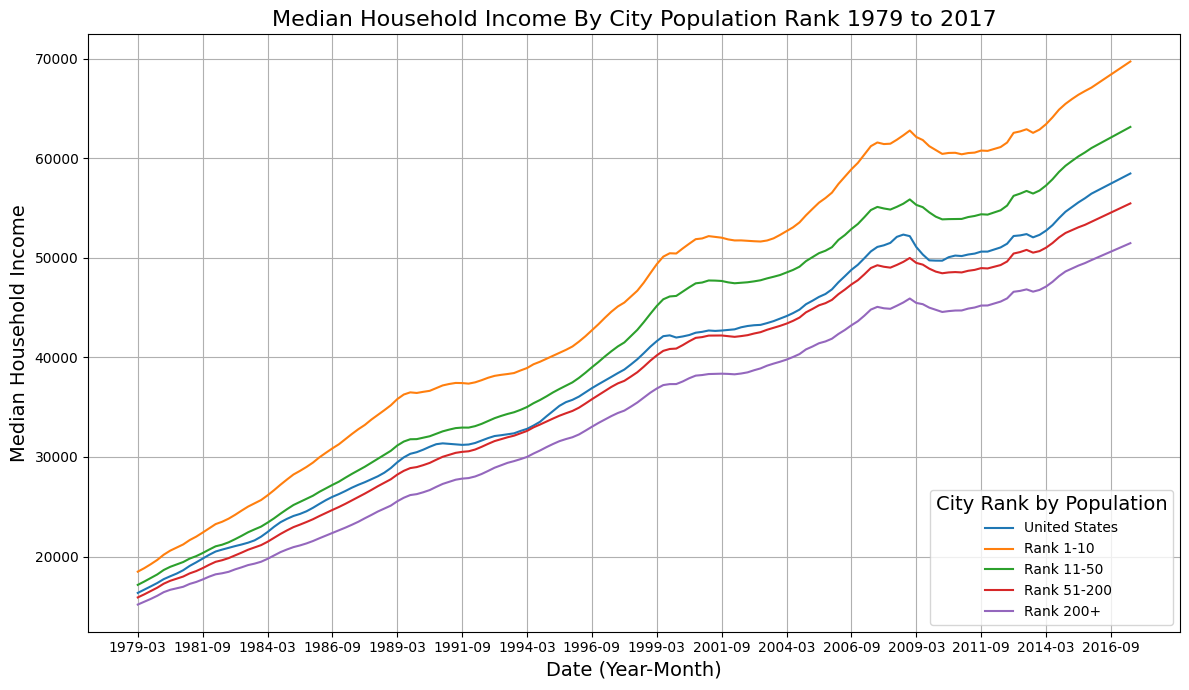

In [37]:
labels = summary_df['label']
summary_df_numeric = summary_df.drop(columns=['label'])

plt.figure(figsize=(12, 7))

for index, row in summary_df_numeric.iterrows():
    plt.plot(summary_df_numeric.columns, row, label=labels[index])

plt.xlabel('Date (Year-Month)', fontsize=14)
plt.ylabel('Median Household Income', fontsize=14)
plt.title('Median Household Income By City Population Rank 1979 to 2017', fontsize=16)
plt.legend(title='City Rank by Population', loc='lower right', fontsize=10, title_fontsize=14, frameon=True)
plt.grid(True)
plt.tight_layout()
plt.xticks(ticks=range(0, len(summary_df_numeric.columns), 10), labels=summary_df_numeric.columns[::10])


plt.show()

<ipython-input-38-793db5536c60>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(labels))


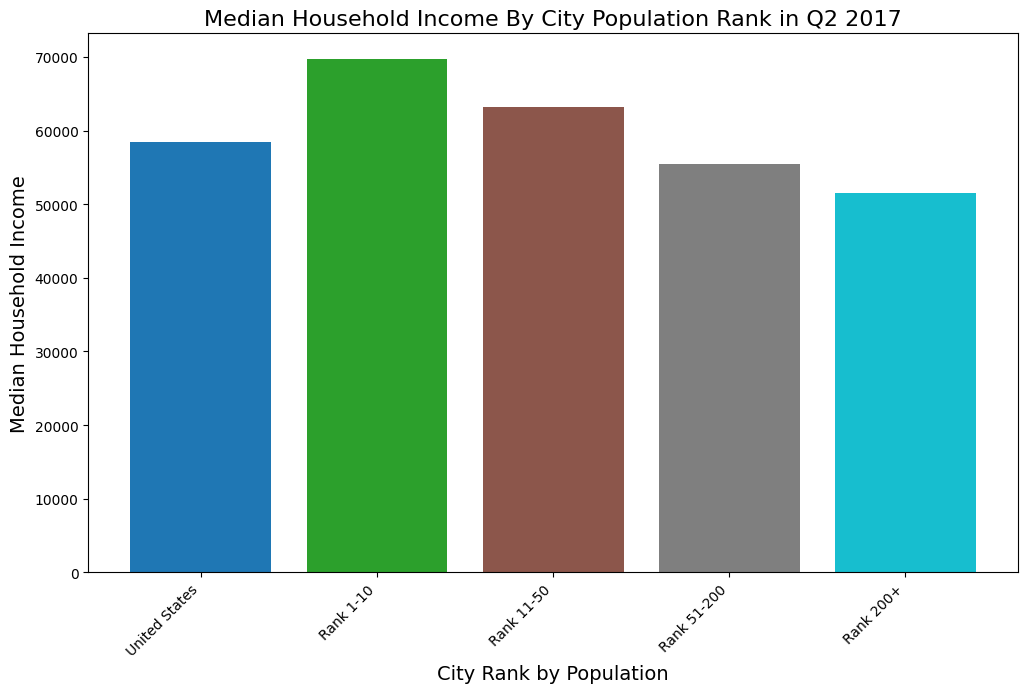

In [38]:
plt.figure(figsize=(12, 7))
colors = plt.cm.get_cmap('tab10', len(labels))
plt.bar(summary_df['label'], summary_df['2017-06'], color=[colors(i) for i in range(len(labels))])
plt.xlabel('City Rank by Population', fontsize=14)
plt.ylabel('Median Household Income', fontsize=14)
plt.title('Median Household Income By City Population Rank in Q2 2017', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.show()


### **Part 2:**

Recreate the visualizations above using the Seaborn library as best as possible.  


**You are required to explain what each of your plots is representing. Plots without comments will not be accepted.**  In addition, please explain the properties you are showcasing.

In [39]:
summary_df_melted = summary_df.melt(id_vars=['label'], var_name='Date', value_name='Income')

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

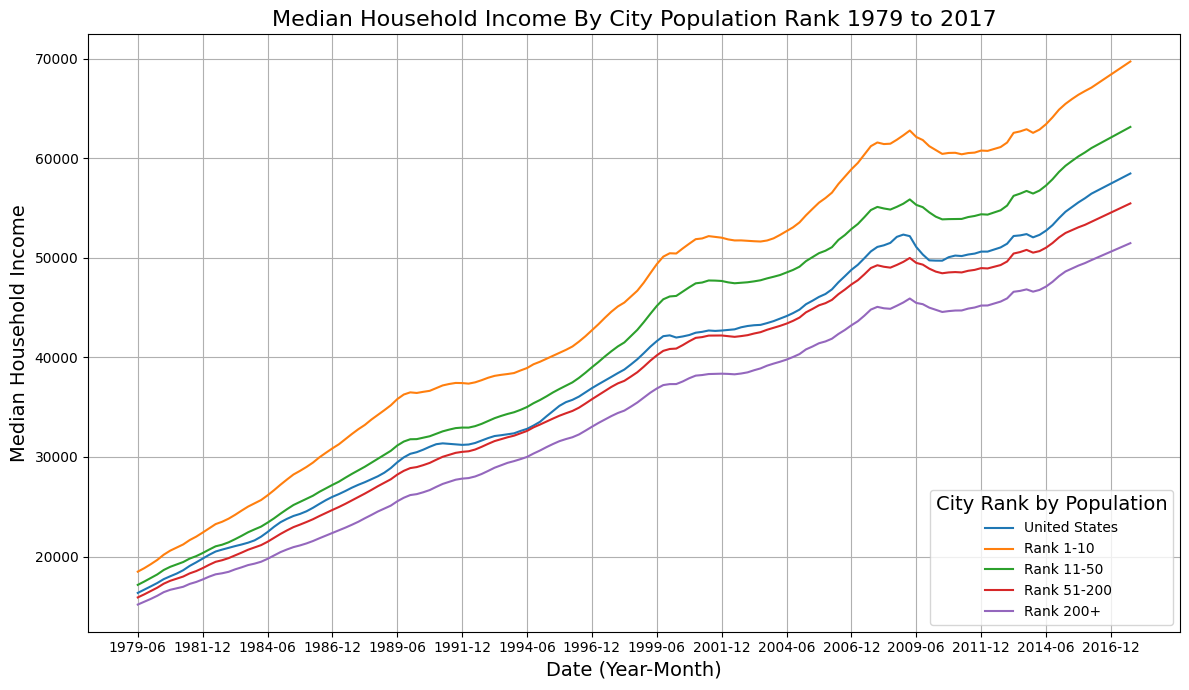

In [40]:
plt.figure(figsize=(12, 7))
sns.lineplot(data=summary_df_melted, x='Date', y='Income', hue='label')

plt.xlabel('Date (Year-Month)', fontsize=14)
plt.ylabel('Median Household Income', fontsize=14)
plt.title('Median Household Income By City Population Rank 1979 to 2017', fontsize=16)
plt.grid(True)
plt.tight_layout()
plt.legend(title='City Rank by Population', loc='lower right', fontsize=10, title_fontsize=14, frameon=True)
plt.xticks(ticks=range(0, len(summary_df.columns) - 1, 10), labels=summary_df.columns[1::10])

plt.show()

With the graph above what I am trying to visualize is the trend of median household incomes overtime of the 4 different buckets of city sizes which I defined and compared to the US overall median income. This graph does not account for inflation, instead focusing purely on relative changes compared to the city size buckets.

What this graph shows off is the ability to change the title, position, and font sizes of the legend, as well as the font sizes of the axis, adding grid lines to the graph, and creating a custom x axis.

<ipython-input-41-bb2ec64f2238>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='label', y='2017-06', data=summary_df, palette='husl')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a l

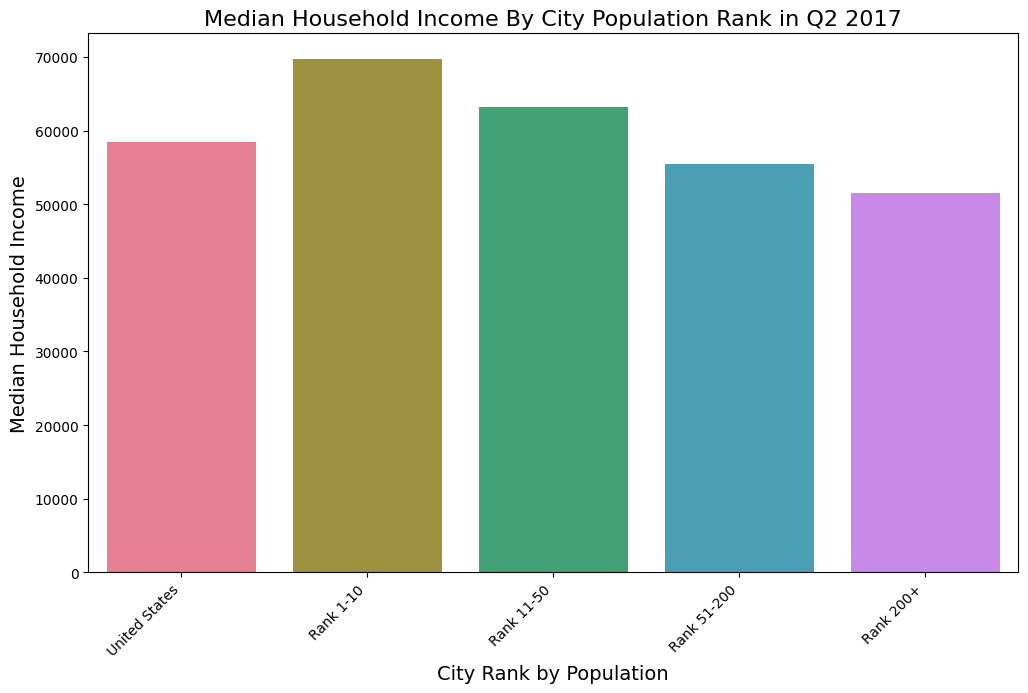

In [41]:
plt.figure(figsize=(12, 7))

sns.barplot(x='label', y='2017-06', data=summary_df, palette='husl')

plt.xlabel('City Rank by Population', fontsize=14)
plt.ylabel('Median Household Income', fontsize=14)
plt.title('Median Household Income By City Population Rank in Q2 2017', fontsize=16)

plt.xticks(rotation=45, ha='right')

plt.show()

With the bar plot above I am looking at a snapshot of the most recent data in the dataset to get the most up to date differences in median household incomes between different sized cities and the US median.

With this graph I am showing off resizing titles, setting x labels to be 45 degrees, and changing the colors of the bars.

### **Part 3:**
In a comment or text box, explain the differences between creating a plot in matplotlib and seaborn, based on your above plots.



From my experience there is not much difference when creating a graph in matplotlib vs seaborn. The reason for this tho is likely personal as I am very picky with my graphs so I will almost never leave default titles, axis marks, legends, etc... and in order to change these in either system you have to use matplotlib. The true main difference I see is wether I am using seaborn or matplotlib to choose the type of graph, but this is not relavent for most graphs as its almost always close to the exact same code. That all said, the one part where seaborn was significantly better and easier to use was when adding color to the bar chart, the colors were nicer and easier to use than in matplotlib.

# Conclusions  

After exploring your dataset, provide a short summary of what you noticed from this dataset.  

The main thing I found when looking at the graphs from the dataset I chose is that in general, the larger the city in terms of population, the higher the median household income. This makes sense as these places of higher population in general will also have a higher cost of living so an obvious follow up study would be to scale each median income by the purchasing power parody for each city rank group. One other take away is that the relative difference in earnings seems to be increasing over time. By this I mean that back in the 1980's there was a relatively small gap between the top cities and those rank 200+, but over time that gap grows larger and larger. This would be another area to investigate more in the future to figure out the reasons for the widening gap and if it leads to higher purchasing power for those in the top cities, or if higher costs in housing and essentials would eliminate this gap.